# Logistic Regression from scratch in Python

Logistic regression is one of the most popular machine learning algorithms of binary classification.

## Load Dataset

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('cancer.csv')
df.head()

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
diag_map = {'M': 1, 'B': 0}
df['diagnosis'] = df['diagnosis'].map(diag_map)
df.drop(df.columns[[-1,0]], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
X = df[['radius_mean', 'perimeter_mean', 'area_mean']]
X = np.array(X)
Y = df['diagnosis']
Y = np.array(Y)

### Scaling features to a range

In [4]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
X = min_max_scaler.fit_transform(X)

## Plot Data

In [5]:
pos = np.where(Y == 1)
neg = np.where(Y == 0)

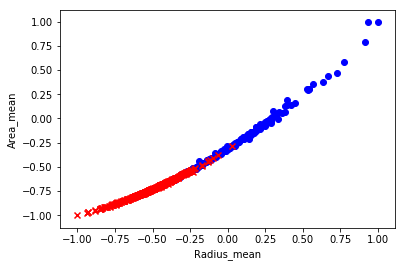

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X[pos, 0], X[pos, 2], marker='o', c='b')
plt.scatter(X[neg, 0], X[neg, 2], marker='x', c='r')
plt.ylabel('Area_mean')
plt.xlabel('Radius_mean')
plt.show()

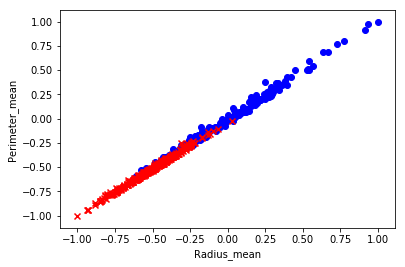

In [7]:
plt.scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
plt.scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
plt.ylabel('Perimeter_mean')
plt.xlabel('Radius_mean')
plt.show()

## Split data into train-test set

In [8]:
from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.33)

/home/snaily/.local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
print('Training data: ',len(X_train))
print('Testing data: ', len(X_test))

Training data:  381
Testing data:  188


## Using Sklearn

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

clf = LogisticRegression()
clf.fit(X_train, Y_train)
print('score: ', clf.score(X_test, Y_test))

score:  0.898936170212766


## From Scratch

### Sigmoid function

In [12]:
import math

def sigmoid(z):
    g_z = 1 / float(1 +  math.exp(-z))
    return g_z

### Hypothesis

In [13]:
def hypothesis(theta, x):
    z = 0
    for i in range(len(theta)):
        z += x[i] * theta[i]
    return sigmoid(z)

### Cost Function

In [14]:
def cost_function(X,Y, theta, m):
    cost = 0
    for i in range(m):
        h = hypothesis(theta, X[i])
        if Y[i] == 1:
            cost += Y[i] * math.log(h)
        elif Y[i] == 0:
            cost += (1-Y[i]) * math.log(1-h)
    J = -1/float(m) * cost
    print('Cost is: ',J)
    return J

### Derivative of Cost Function

In [15]:
def derivative_of_J(X, Y, theta, j, m, alpha):
    sumErrors = 0
    for i in range(m):
        xi = X[i]
        h = hypothesis(theta, xi)
        error = (h - Y[i])*xi[j]
        sumErrors += error
    m = len(Y)
    dJ = (1 / float(m)) * sumErrors
    return dJ

### Gradient Descent

In [16]:
def GradientDescent(X, Y, theta, m, alpha):
    new_theta = []
    for j in range(len(theta)):
        dJ = derivative_of_J(X, Y, theta, j, m, alpha)
        theta_n = theta[j] - alpha * dJ
        new_theta.append(theta_n)
    return new_theta

### Logistic Regression

In [17]:
def LogisticRegression(X, Y, alpha, theta, n_iters):
    m = len(Y)
    for x in range(n_iters):
        new_theta = GradientDescent(X, Y, theta, m, alpha)
        theta = new_theta
        if x % 100 == 0:
            print('Iteration no ',x)
            print ('theta: ',theta)
            cost_function(X,Y,theta, m)
            print('------------------------')
    accuracy(theta)

### Accuracy

In [18]:
def accuracy(theta):
    score = 0
    winner = ""
    
    sk_score = clf.score(X_test, Y_test)
    for i in range(len(X_test)):
        prediction = round(hypothesis(X_test[i], theta))
        answer = Y_test[i]
        if prediction == answer:
            score +=1
    myscore = score/float(len(X_test))
    print('Score')
    print('From Scratch: ', myscore)
    print('Using Sklearn: ', sk_score)

## Run algorithm

In [20]:
initial_theta = [0,0,0]
alpha = 0.1
iterations = 1000
LogisticRegression(X, Y, alpha, initial_theta, iterations)

Iteration no  0
theta:  [0.015886248512256403, 0.016305035985552066, 0.017438713152318343]
Cost is:  0.6850078217384337
------------------------
Iteration no  100
theta:  [0.8151087004821357, 0.8405790145252846, 0.6787924449584906]
Cost is:  0.47252661426805465
------------------------
Iteration no  200
theta:  [1.1271232116419934, 1.167104655665314, 0.6740828785050499]
Cost is:  0.4511489845006424
------------------------
Iteration no  300
theta:  [1.3322316335983309, 1.384637195181756, 0.5339766503328418]
Cost is:  0.440161340356656
------------------------
Iteration no  400
theta:  [1.4986318080409355, 1.562976569326582, 0.3554187449735719]
Cost is:  0.43101327216132457
------------------------
Iteration no  500
theta:  [1.6471262000620894, 1.7234102378569065, 0.16769526197717813]
Cost is:  0.4227093111146951
------------------------
Iteration no  600
theta:  [1.785403927834729, 1.8737944562769742, -0.018867874874902938]
Cost is:  0.4150554239410888
------------------------
Iteratio

#### Changing value of alpha to 0.5

In [21]:
initial_theta = [0,0,0]
alpha = 0.5
iterations = 1000
LogisticRegression(X, Y, alpha, initial_theta, iterations)

Iteration no  0
theta:  [0.079431242561282, 0.08152517992776033, 0.08719356576159171]
Cost is:  0.6541281302753837
------------------------
Iteration no  100
theta:  [1.6542466172372672, 1.7309718824753264, 0.1597949262888396]
Cost is:  0.42234272195173983
------------------------
Iteration no  200
theta:  [2.2846337110791524, 2.4242040065928423, -0.7162547517835848]
Cost is:  0.38936774916358824
------------------------
Iteration no  300
theta:  [2.8061317801281285, 3.013848791411381, -1.4470138524962077]
Cost is:  0.3662597516642751
------------------------
Iteration no  400
theta:  [3.247368310916744, 3.527293675116385, -2.064570505176656]
Cost is:  0.3494467780756913
------------------------
Iteration no  500
theta:  [3.625799000407808, 3.981004929961025, -2.59586597558522]
Cost is:  0.3368091495010725
------------------------
Iteration no  600
theta:  [3.9541134962428286, 4.3869519683512035, -3.0598347867782305]
Cost is:  0.32704575842970024
------------------------
Iteration no  